In [1]:
import ROOT
from run_kinfit import build_custom_hypo
from draw_funcs import draw_chi2_gaussian_sim, draw_1d_hist, draw_2d_hist2
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
entry = 5
nevents = 1000000
mfield = 1.3
input_path = '/var/kinfit/data/tr_ph_run039784.root'
output_path = 'kinfit_pi0gamma_run039784.root'

In [3]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/gaussgen/share/gaussgen/rootlogon.C")')

0

(int) 0


In [4]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/kfcmd/share/kfcmd/rootlogon.C")')

0

(int) 0


In [5]:
build_custom_hypo('Hypo3PhotonsCustom.cpp')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/gauss_sim_pi0gamma/gauss_sim_pi0gamma_pull_xy_nonmeas/Hypo3PhotonsCustom_cpp.so


In [6]:
ROOT.gInterpreter.ProcessLine('.L TrPh.C++')

0

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/gauss_sim_pi0gamma/gauss_sim_pi0gamma_pull_xy_nonmeas/TrPh_C.so


In [7]:
ROOT.gInterpreter.ProcessLine('TFile fl("{}", "read")'.format(input_path))

139711005815024

(TFile &) Name: /var/kinfit/data/tr_ph_run039784.root Title: 


In [8]:
ROOT.gInterpreter.ProcessLine('TrPh a(tr_ph)')

139709150965760

(TrPh &) @0x7f109250b000


In [9]:
ROOT.gInterpreter.ProcessLine('a.setNEvents({})'.format(nevents))

0

In [10]:
ROOT.gInterpreter.ProcessLine('a.setEntry({})'.format(entry))

0

In [11]:
ROOT.gInterpreter.ProcessLine('a.Loop("{output_path}", {mfield})'.format(output_path=output_path, mfield=mfield))

0

[!] Fit isn't converged


In [12]:
ROOT.gInterpreter.ProcessLine('fl.Close()')

0

In [13]:
fl = TFile.Open(output_path, 'read')

In [14]:
ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
                                        return 0.1875 * p[0] * ROOT::Math::chisquared_pdf(x[0], p[1]);}''')

0

In [15]:
ROOT.gInterpreter.ProcessLine('TF1 f0("f0", fcn, 0, 24, 2)')

139711005815896

(TF1 &) Name: f0 Title: f0


In [16]:
ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 2.e+4)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(1, 6)')

0

In [17]:
ROOT.gInterpreter.ProcessLine('kf_chi2->Fit(&f0)')

94883519061504

 FCN=201.454 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=1.21265e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.97990e+05   9.98117e+02   6.83369e+00  -2.72101e-08
   2  p1           3.04857e+00   2.09050e-03   1.45249e-05   1.97143e-02
(TFitResultPtr) <nullptr TFitResult>


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


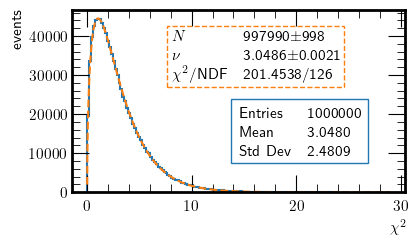

In [18]:
draw_chi2_gaussian_sim("kf_chi2", "f0", 
                       xlabel=r'$\chi^2$',
                       ylabel='events',
                       fraction=0.8,
                       info_coords=(0.5, 0.2),
                       dw=-0.2,
                      dh=0.4,
                      h_y=10000,
                      h_x=10)
plt.savefig('kf_chi2_gsim_etapipi.eps')

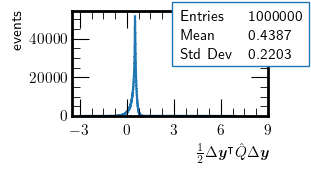

In [19]:
draw_1d_hist("qhist", 
             xlabel=r'$\frac{1}{2}\Delta\bm{y}^{\intercal}\hat{Q}\Delta\bm{y}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.55, 0.55),
            h_y=20000, h_x=3)
plt.gcf().subplots_adjust(bottom=0.275)
plt.savefig("qhalf_gsim_etapipi.eps", bbox_inches='tight')

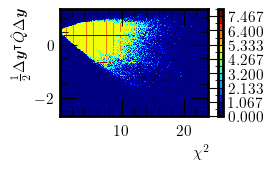

In [20]:
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(0, 8, 16)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
draw_2d_hist2('chi2_vs_q', 
              xlabel=r'$\chi^2$', 
              ylabel=r'$\frac{1}{2}\Delta\bm{y}^{\intercal}\hat{Q}\Delta\bm{y}$', 
              fraction=0.47,
              bins=(200, 200),
              norm=norm,
              clip=((0, 30.), (-3., 5.)))
plt.gcf().subplots_adjust(left=0.235)
plt.gcf().subplots_adjust(bottom=0.26)
plt.savefig('qhalf_vs_chi2_gsim_etapipi.eps')

In [21]:
from ROOT import TCanvas

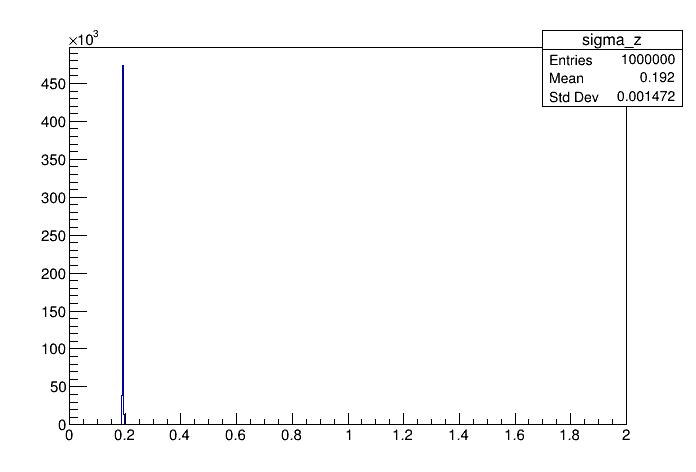

In [22]:
cnv0 = TCanvas()
fl.sigma_z.Draw()
cnv0.Draw()

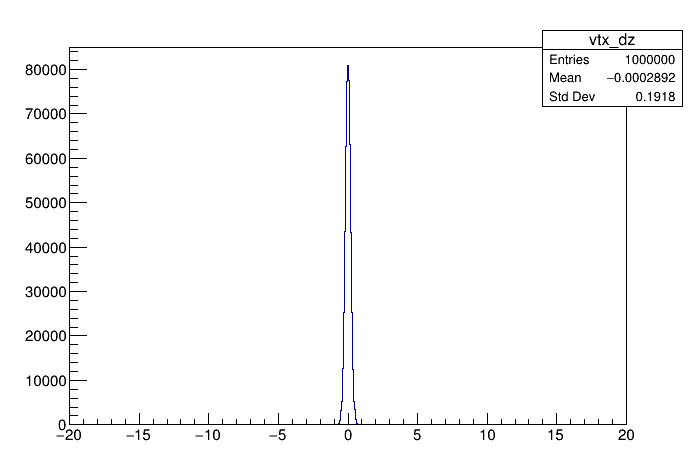

In [23]:
cnv1 = TCanvas()
fl.vtx_dz.Draw()
cnv1.Draw()

Info in <TCanvas::SaveAs>: ROOT file pi0gamma_gaussian_sim_vtx0_dz_pull.root has been created


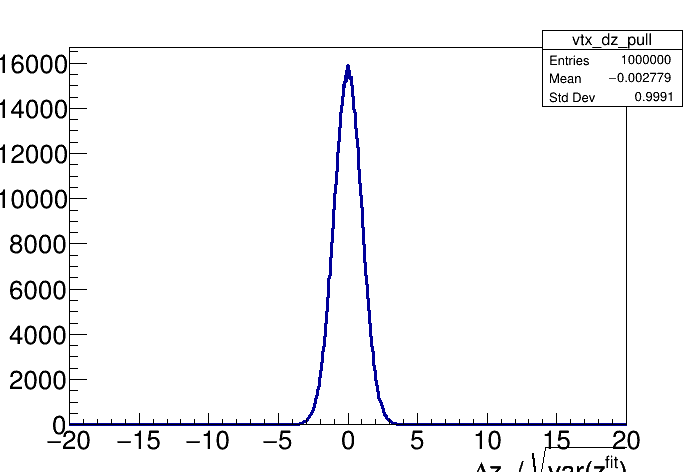

In [24]:
cnv2 = TCanvas()
fl.vtx_dz_pull.Draw()
hist = fl.vtx_dz_pull
hist.SetLineWidth(3)
hist.GetXaxis().SetTitle("#Deltaz_{1} / #sqrt{var(z^{fit}_{1})}")
hist.GetXaxis().SetTitleSize(0.06)
hist.GetXaxis().SetLabelSize(0.06)
hist.GetYaxis().SetTitle("events")
hist.GetYaxis().SetTitleSize(0.06)
hist.GetYaxis().SetLabelSize(0.06)
cnv2.Draw()
cnv2.SaveAs('pi0gamma_gaussian_sim_vtx0_dz_pull.root')

In [25]:
# fl.Close()